In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def display(img,cmap=None):
    plt.figure(figsize=(10,8))
    plt.imshow(img,cmap=cmap)

# i. Grid Detection
### Grid patterns are often use to calibrate camaras and track motion

### In real senario our image should be clean enough to track 'chessboard\grid' like patterns

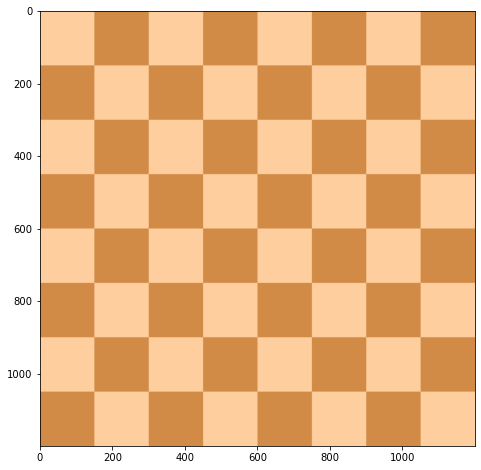

In [3]:
flat_chess=cv2.imread('C:\\Users\\Akhilesh\\Downloads\\flatchess.png')
flat_chess=cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
display(flat_chess)

### 'Chessboard' type grid

In [10]:
found,corners=cv2.findChessboardCorners(flat_chess,(7,7))
found,corners.shape

(True, (49, 1, 2))

In [11]:
#  This code will draw on the img itself we pass
cv2.drawChessboardCorners(flat_chess,(7,7),corners,found)

array([[[255, 206, 158],
        [255, 206, 158],
        [255, 206, 158],
        ...,
        [209, 139,  71],
        [209, 139,  71],
        [209, 139,  71]],

       [[255, 206, 158],
        [255, 206, 158],
        [255, 206, 158],
        ...,
        [209, 139,  71],
        [209, 139,  71],
        [209, 139,  71]],

       [[255, 206, 158],
        [255, 206, 158],
        [255, 206, 158],
        ...,
        [209, 139,  71],
        [209, 139,  71],
        [209, 139,  71]],

       ...,

       [[209, 139,  71],
        [209, 139,  71],
        [209, 139,  71],
        ...,
        [255, 206, 158],
        [255, 206, 158],
        [255, 206, 158]],

       [[209, 139,  71],
        [209, 139,  71],
        [209, 139,  71],
        ...,
        [255, 206, 158],
        [255, 206, 158],
        [255, 206, 158]],

       [[209, 139,  71],
        [209, 139,  71],
        [209, 139,  71],
        ...,
        [255, 206, 158],
        [255, 206, 158],
        [255, 206, 158]]

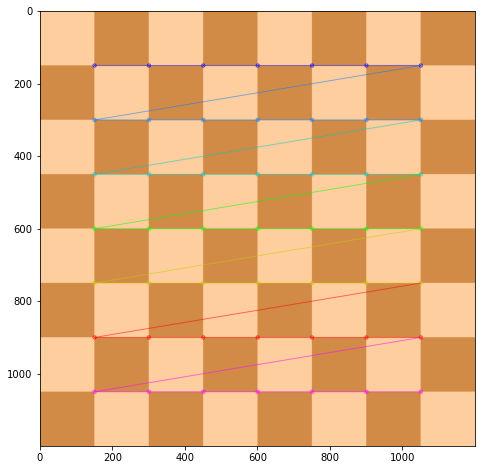

In [12]:
display(flat_chess)

### 'Circle' type grid

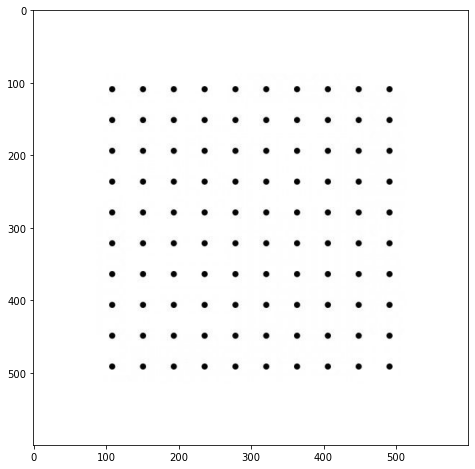

In [41]:
dot=cv2.imread('C:\\Users\\Akhilesh\\Downloads\\dot_grid.jpg')
display(dot)

In [42]:
found,corners=cv2.findCirclesGrid(dot,(6,6),cv2.CALIB_CB_SYMMETRIC_GRID)  # para:- 1.image(inplace=True),2.size of grid(6,6) in this case
found,corners.shape

(True, (36, 1, 2))

In [43]:
cv2.drawChessboardCorners(dot,(6,6),corners,found)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

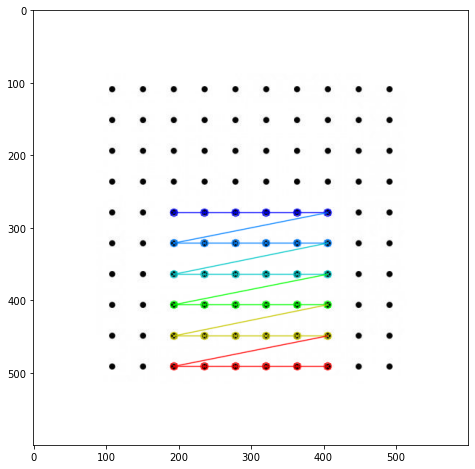

In [44]:
display(dot)

# contour Detection

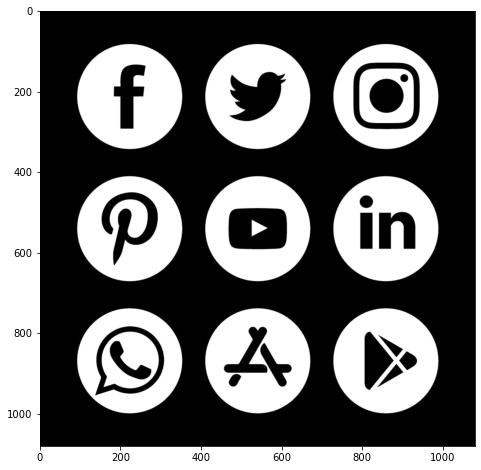

In [119]:
img=cv2.imread('C://Users//Akhilesh//Downloads/cont.jpg',0)
display(img,'gray')

In [120]:
img.shape

(1080, 1080)

In [121]:
''' parameters
    1.image
    2.contous type ,,i.e cv2.RETR_CCOMP for both internal and ext. contours
                         cv2.RETR_EXTERNAL for only ext. contours
    3.method                     '''

contours,hierarchy,=cv2.findContours(img,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [122]:
print(type(contours))
type(hierarchy)

<class 'list'>


numpy.ndarray

In [123]:
#array of lines where it find where the contours are
hierarchy.shape,hierarchy

((1, 3784, 4),
 array([[[   1,   -1,   -1,   -1],
         [   2,    0,   -1,   -1],
         [   3,    1,   -1,   -1],
         ...,
         [3782, 3780,   -1, 3563],
         [3783, 3781,   -1, 3563],
         [  -1, 3782,   -1, 3563]]], dtype=int32))

### Looking for External contours 
#### i.e hierarchy[0][i][:]==-1

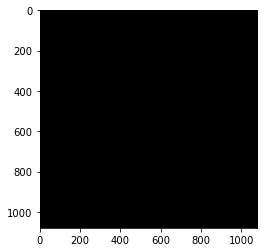

In [124]:
ext_contours=np.zeros(img.shape)
plt.imshow(ext_contours,'gray')

In [130]:
# for ref.
for i in range(len(contours)):
    if hierarchy[0][i][3]==-1:  # checking for ext. contour (-1)  else 'specific no' for diff. internal contours 
        cv2.drawContours(ext_contours,contours,i,255,-1)

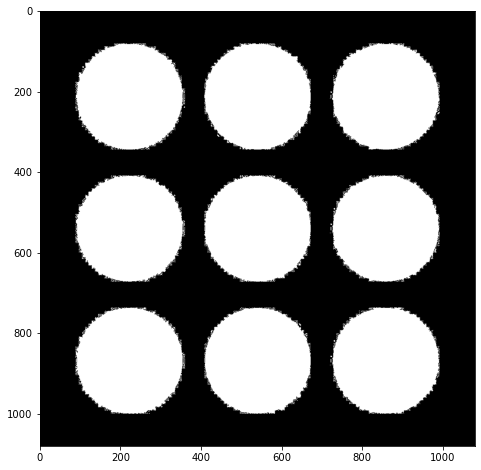

In [126]:
display(ext_contours,'gray')  #detect fig will only background touch (Extrnal contour)

### Looking for Internal contours 
#### i.e hierarchy[0][i][:]!=-1

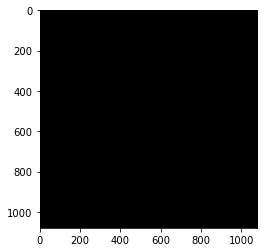

In [127]:
ext_contours=np.zeros(img.shape)
plt.imshow(ext_contours,'gray')

In [128]:
# for ref.
for i in range(len(contours)):
    if hierarchy[0][i][3]!=-1:  # checking for ext. contour (-1)  else internal contour
        cv2.drawContours(ext_contours,contours,i,255,-1)

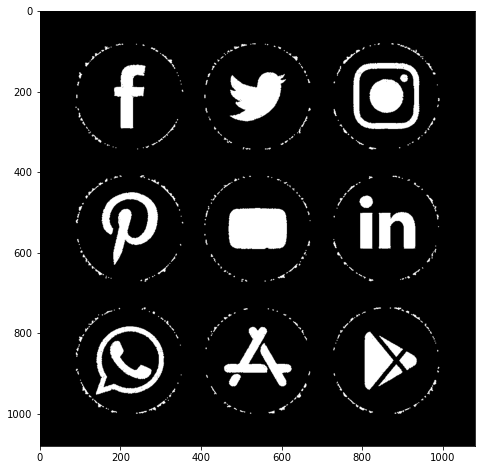

In [129]:
display(ext_contours,'gray')  #detect fig will only background touch (Intrnal contour)

### Looking for facebook Internal contours 
#### i.e hierarchy[0][i][:]== some no. in 4th coloum in hierarchy

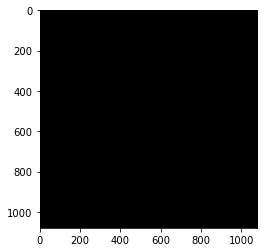

In [131]:
ext_contours=np.zeros(img.shape)
plt.imshow(ext_contours,'gray')

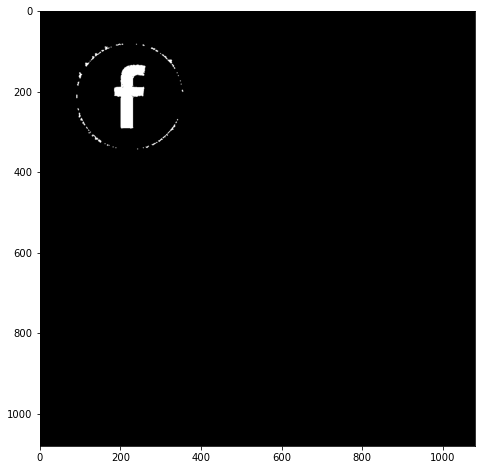

In [135]:
for i in range(len(contours)):
    if hierarchy[0][i][3]==3563:  # checking for 'facebook' contour
        cv2.drawContours(ext_contours,contours,i,255,-1)
display(ext_contours,'gray')        